## Week 06

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px


In [47]:
df.columns

Index(['year', 'month', 'day', 'gender', 'births', 'Decade', 'Date',
       'Weekday'],
      dtype='object')

In [48]:
df = pd.read_csv('births.csv')
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


### Q1) Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc.


In [49]:
df['Decade'] = (df['year'] // 10) * 10
df.head()

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


### Q2) Show the descriptive statistics of the data.

In [50]:
print('Descriptive Statistics')
df.describe()

Descriptive Statistics


,year,month,day,births,Decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


### Q3) Check if your data contains any missing values


In [51]:
print('Missing Data')
df.isnull().sum()

Missing Data


year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

### Q4) What is the trend of male & female births every decade?

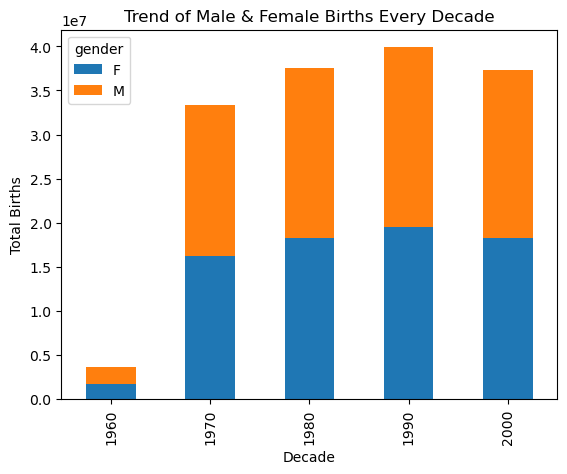

In [52]:
trends = df.groupby(['Decade', 'gender'])['births'].sum().unstack()
trends.plot(kind='bar', stacked=True)
plt.title('Trend of Male & Female Births Every Decade')
plt.xlabel('Decade')
plt.ylabel('Total Births')
plt.show()


### Q5) To remove outliers from dataset following techinque to include only those values that fall within 5 standard deviations from the mean.This is a common statistical technique used to focus on the central tendency of the data while excluding extreme values. Use this technique to remove outliers.

In [53]:
mean = df['births'].mean()
std_dev = df['births'].std()
df = df[(df['births'] >= mean - 5 * std_dev) & (df['births'] <= mean + 5 * std_dev)]
df

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15309,1999,2,NaN,F,145172,1990
15357,2001,2,NaN,F,148640,2000
15381,2002,2,NaN,F,148745,2000
15405,2003,2,NaN,F,150278,2000


### Q6) Plot births by weekday for several decades. Write down your observation.

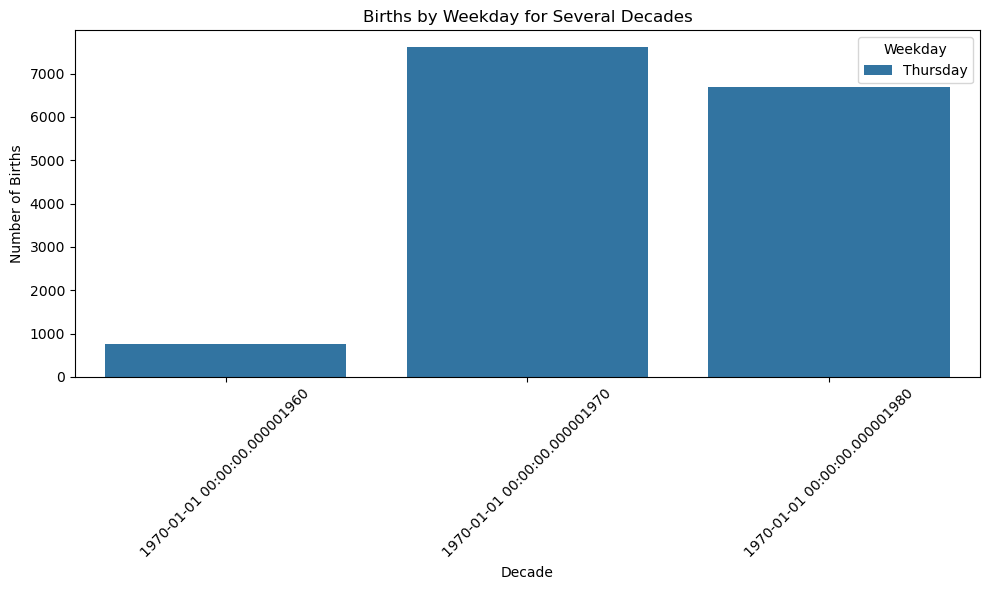

In [63]:

mean = data['births'].mean()
std_dev = data['births'].std()
data = data[(data['births'] >= mean - 5 * std_dev) & (data['births'] <= mean + 5 * std_dev)]

# Convert 'Decade' column to datetime
data['Decade'] = pd.to_datetime(data['Decade'], format='%Y')

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Decade', hue='Weekday')
plt.title('Births by Weekday for Several Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.legend(title='Weekday', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


### Q7) Group the data by month and day separately

In [42]:
births_by_month = df.groupby('month')['births'].sum()
births_by_day = df.groupby('day')['births'].sum()


### Q8) Focusing on the month and day only, you have a time series reflecting the average number of births by date of the year. From this, plot the data.

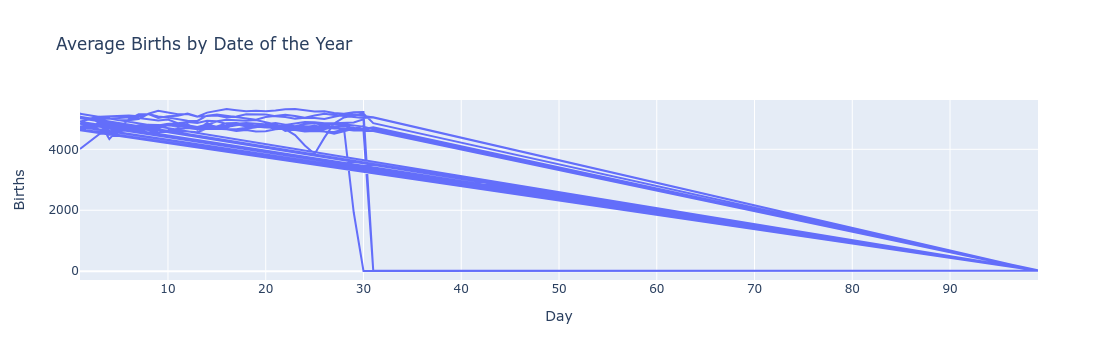

In [62]:
average_births = df.groupby(['month', 'day'])['births'].mean().reset_index()

fig = px.line(average_births, x='day', y='births', title='Average Births by Date of the Year')
fig.update_xaxes(title_text='Day')
fig.update_yaxes(title_text='Births')
fig.show()